# Computation of effective response of composite materials

## Effective stiffness tensor of a 2-phase composite (matrix reinforced by spherical particles)

In [1]:
import pylab
import numpy as np
from simcoon import simmit as sim
import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools
from IPython.display import HTML
dir = os.path.dirname(os.path.realpath('__file__'))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

nstatev = 0

nphases = 2 #The number of phases
num_file = 0 #The num of the file that contains the subphases
int1 = 50
int2 = 50
n_matrix = 0

props = np.array([nphases, num_file, int1, int2, n_matrix],  dtype='float')

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

umat_name = 'MIMTN'

L_eff = sim.L_eff(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve)
p = sim.L_iso_props(L_eff)
np.set_printoptions(precision=3, suppress=True)
print('L_eff = ', L_eff)
print(p)


L_eff =  [[6884.784 1651.472 1651.472    0.       0.      -0.   ]
 [1651.472 6884.784 1651.472   -0.       0.       0.   ]
 [1651.472 1651.472 6884.784   -0.      -0.       0.   ]
 [   0.      -0.      -0.    2616.656   -0.       0.   ]
 [   0.       0.      -0.      -0.    2616.656   -0.   ]
 [  -0.       0.       0.       0.      -0.    2616.656]]
[6245.778    0.193]


## Comparison betwwen Mori-Tanaka and Self-Consistent method for the analysis of a 2-phase composite (matrix reinforced by spherical particles)

/var/folders/1d/symgspq13hdgdz29n3fjhrqh5q7tjz/T/ipykernel_3022/564427526.py:15: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  NPhases = pd.read_csv(NPhases_file, delimiter=r'\s+', index_col=False, engine='python')


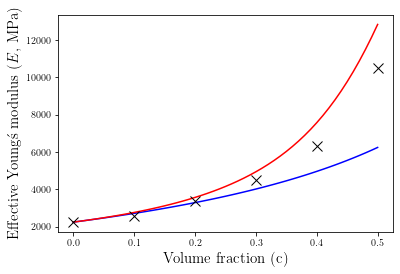

In [2]:
dir = os.path.dirname(os.path.realpath('__file__'))
pylab.rcParams['figure.figsize'] = (18.0, 8.0) #configure the figure output size

nstatev = 0

nphases = 2 #The number of phases
num_file = 0 #The num of the file that contains the subphases
int1 = 50
int2 = 50
n_matrix = 0

props = np.array([nphases, num_file, int1, int2, n_matrix],  dtype='float')

NPhases_file = dir + '/keys/Nellipsoids0.dat'
NPhases = pd.read_csv(NPhases_file, delimiter=r'\s+', index_col=False, engine='python')
#NPhases[::]

path_data = dir + '/data'
path_keys = dir + '/keys'
pathfile = 'path.txt'

nparams = 4
param_list = sim.read_parameters(nparams)

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

concentration = np.arange(0.,0.51,0.01)

E_MT = np.zeros(len(concentration))
umat_name = 'MIMTN'
for i, x in enumerate (concentration):
 
    param_list[1].value = x
    param_list[0].value = 1.-x
    
    sim.copy_parameters(param_list, path_keys, path_data)
    sim.apply_parameters(param_list, path_data)

    L = sim.L_eff(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve)
    p = sim.L_iso_props(L)
    E_MT[i] = p[0]

    
E_SC = np.zeros(len(concentration))
umat_name = 'MISCN'
for i, x in enumerate (concentration):
 
    param_list[1].value = x
    param_list[0].value = 1.-x
    
    sim.copy_parameters(param_list, path_keys, path_data)
    sim.apply_parameters(param_list, path_data)

    L = sim.L_eff(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve)
    p = sim.L_iso_props(L)
    E_SC[i] = p[0]

fig = plt.figure()
plt.xlabel(r'Volume fraction (c)', size = 15)
plt.ylabel(r'Effective Young\'s modulus ($E$, MPa)', size = 15)
plt.plot(concentration,E_MT, c='blue', label = 'Mori-Tanaka')
plt.plot(concentration,E_SC, c='red', label = 'Self-Consistent')
expfile = path_data + '/' + 'E_exp.txt'
c,E = np.loadtxt(expfile, usecols=(0,1), unpack=True)
plt.plot(c,E,linestyle='None', marker='x', color='black', markersize=10)
plt.show()